In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [56]:
df=pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
df.shape

(4238, 16)

In [58]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

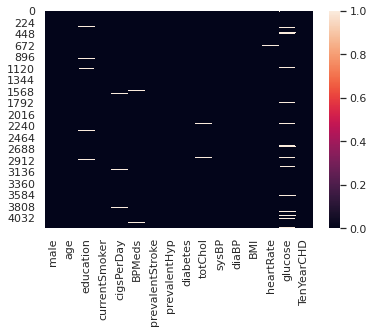

In [59]:
sns.heatmap(df.isnull())

In [60]:
df.isnull().sum()/df.shape[0]*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [61]:
df=df.drop(['education','cigsPerDay','BPMeds'],axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   prevalentStroke  4238 non-null   int64  
 4   prevalentHyp     4238 non-null   int64  
 5   diabetes         4238 non-null   int64  
 6   totChol          4188 non-null   float64
 7   sysBP            4238 non-null   float64
 8   diaBP            4238 non-null   float64
 9   BMI              4219 non-null   float64
 10  heartRate        4237 non-null   float64
 11  glucose          3850 non-null   float64
 12  TenYearCHD       4238 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 430.5 KB


In [63]:
miss=[v for v in df.columns if df[v].isnull().sum()>0]

df[miss]

,totChol,BMI,heartRate,glucose
0,195.0,26.97,80.0,77.0
1,250.0,28.73,95.0,76.0
2,245.0,25.34,75.0,70.0
3,225.0,28.58,65.0,103.0
4,285.0,23.10,85.0,85.0
...,...,...,...,...
4233,313.0,25.97,66.0,86.0
4234,207.0,19.71,65.0,68.0
4235,248.0,22.00,84.0,86.0
4236,210.0,19.16,86.0,NaN


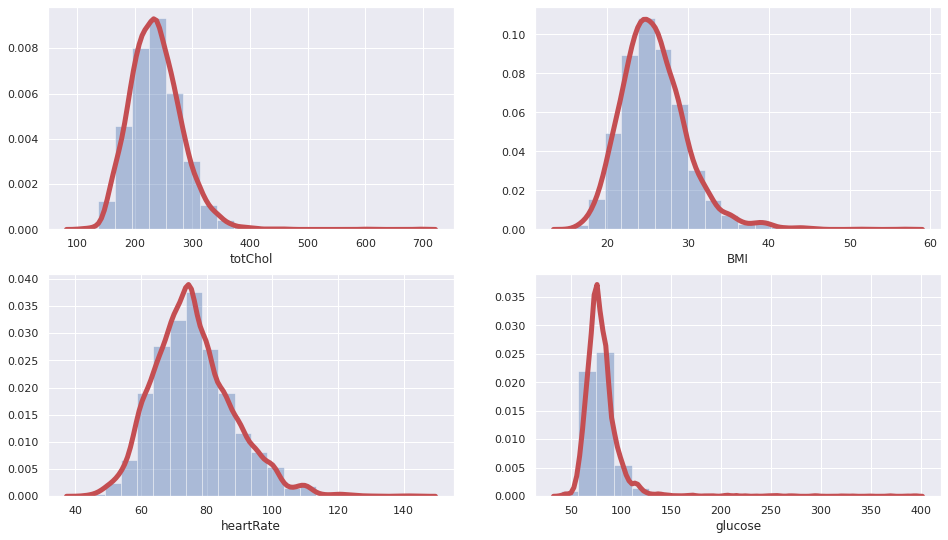

In [64]:
plt.figure(figsize=(16,9))
sns.set()
for i,var in enumerate(miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
    

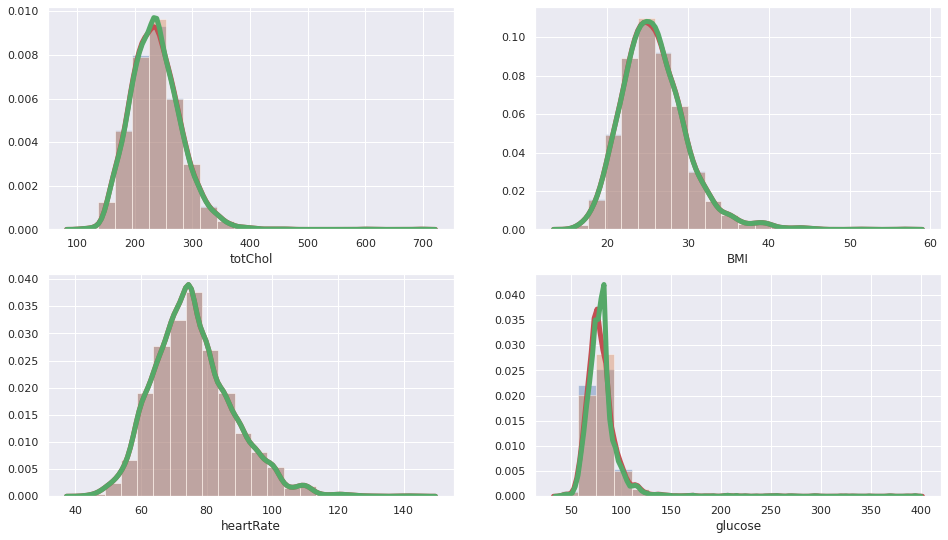

In [72]:
df2=df.fillna(df.mean())
plt.figure(figsize=(16,9))
sns.set()
for i,var in enumerate(miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
    sns.distplot(df2[var],bins=20,kde_kws={'linewidth':5,'color':'g'})
    

In [67]:
df2.isnull().sum().sum()

0

In [68]:
df2

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


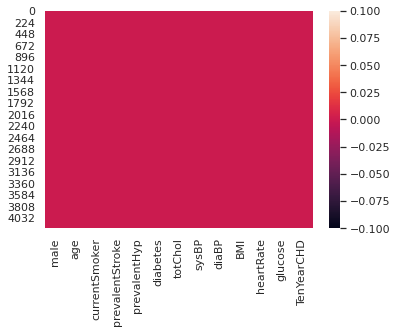

In [69]:
sns.heatmap(df2.isnull())

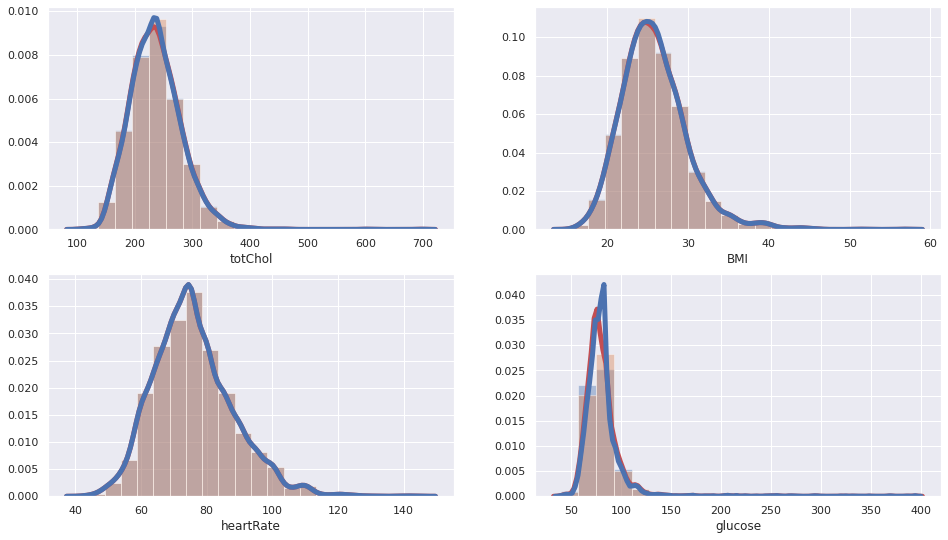

In [78]:
d3=df.fillna(df.median())
plt.figure(figsize=(16,9))
sns.set()
for i,var in enumerate(miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
    #sns.distplot(df2[var],bins=20,kde_kws={'linewidth':5,'color':'g'})
    sns.distplot(df2[var],bins=20,kde_kws={'linewidth':5,'color':'b'})

<Figure size 1152x648 with 0 Axes>

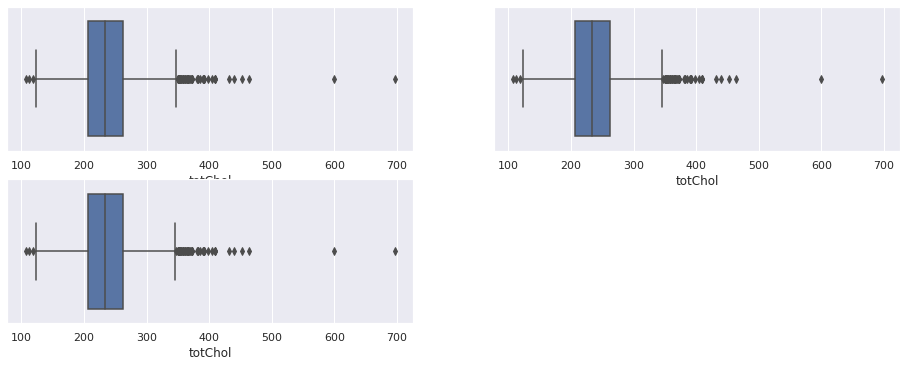

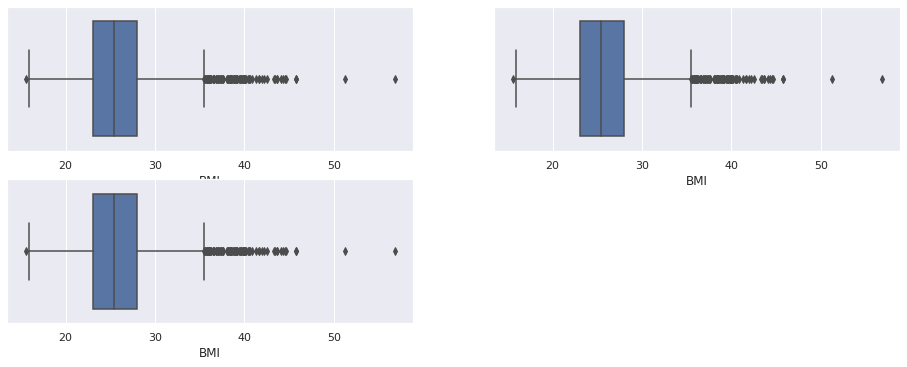

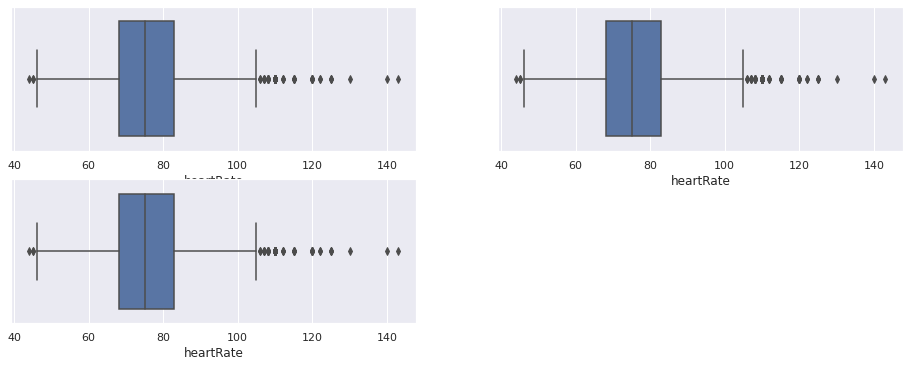

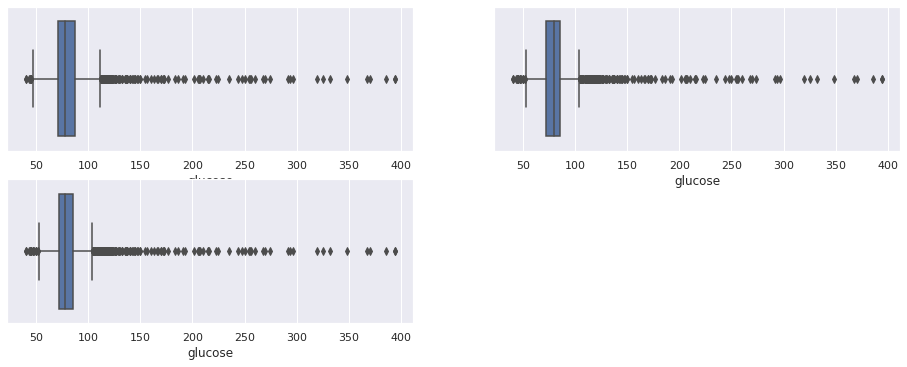

In [79]:
plt.figure(figsize=(16,9))
sns.set()
for i,var in enumerate(miss):
    plt.figure(figsize=(16,9))
    plt.subplot(3,2,1)
    sns.boxplot(df[var])
    plt.subplot(3,2,2)
    sns.boxplot(df2[var])
    plt.subplot(3,2,3)
    sns.boxplot(d3[var])
    

In [81]:
x=d3.drop('TenYearCHD',axis=1)
y=d3['TenYearCHD']

In [82]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [84]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))

In [85]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=("%s: %f (%f)" % (name,cv_result.mean(),cv_result.std()))
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.852524 (0.017768)
DT: 0.756256 (0.013784)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KN: 0.833877 (0.018163)
NB: 0.827744 (0.018323)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.848278 (0.015104)


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [88]:
my_model=LogisticRegression()
my_model.fit(x_train,y_train)
y_pred=my_model.predict(x_test)

In [101]:
print('Training Accuracy:- ',my_model.score(x_train,y_train))

Training Accuracy:-  0.8489675516224189


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy:- ',accuracy_score(y_test,y_pred)*100,'%')
print('Classification Report:-\n',classification_report(y_test,y_pred))

Confusion_matrix:
 [[724   9]
 [108   7]]
Accuracy:-  86.20283018867924 %
Classification Report:-
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       733
           1       0.44      0.06      0.11       115

    accuracy                           0.86       848
   macro avg       0.65      0.52      0.52       848
weighted avg       0.81      0.86      0.81       848

